# CNN model with MNIST dataset

In [1]:
#@presented by: Bahareh Shidrang

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.image import grayscale_to_rgb
from tensorflow.keras.utils import to_categorical
from tensorflow.dtypes import cast

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import matplotlib.pyplot as plt

In [2]:
def dataPrepration(image0, label0):
    """
    Images: reshape: changing the shape of an array and in this case Convert 
    the following 1-D array into a 3-D array. so instead of (x, 28, 28), 
    we will have (x, 28, 28, 1)
    """
    image_grayscale = image0.reshape(image0.shape[0], 28, 28, 1)
    """
    Images: rgb converting of original grayscale images, in other words adding 
    rgb layers so instead of (x, 28, 28, 1), we will have (x, 28, 28, 3)
    """
    image_rgb = grayscale_to_rgb(tf.convert_to_tensor(image_grayscale))
    """
    # Labels: to_categorically: Converts a class vector (integers) to binary 
    class matri_image. so instead of 9 we would have [0 0 0 0 0 0 0 0 0 1]
    """
    label = to_categorical(label0)
    # Images: convert from integers to floats
    image_rgb_float = cast(image_rgb, tf.float32)
    # Images: normalize to range 0-1
    image_rgb_norm = image_rgb_float / 255.0
    return image_rgb_norm, label

#Load Data and prepration
def dataLoad():
    (train_image0, train_label0), (test_image0, test_label0) = mnist.load_data()
    train_image_norm, train_label = dataPrepration(train_image0, train_label0)
    test_image_norm, test_label = dataPrepration(test_image0, test_label0)
    return train_image_norm, train_label, test_image_norm, test_label



In [13]:
def cnn_model():
    
    """
    3 way to make Keras models:
    1.The Sequential model makes a simple list of layers,but is limited to 
    single-input,single-output stacks of layers.
    2.The Functional API supports arbitrary model architectures. This is the 
    Keras "industry strength" model.
    3.Model subclassing for complex, out-of-the-box research use cases.
    """
    

    model = Sequential()
    
    """
    2D convolution layer : 32 as number of filters, (3,3) as size of filters 
    or height and width of the 2D convolution window. 
    f(Neuron output)=final-output Activation function as Rectified Linear Unit 
    (ReLU) as if x<0: f(x)=0 elif x>=0: f(x)=x 
    """
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
    #choosing max from a pool windows size of (2,2)
    model.add(MaxPooling2D((2, 2)))
    #removing all dimension and making it into one dimension array
    model.add(Flatten())
    # densely-connected NN layer/fully connected layers
    model.add(Dense(100, activation='relu'))
    #softmax as f(x_i)=e^(x_i)/sum(e^(x_j)), gives out probabilities
    model.add(Dense(10, activation='softmax'))
    
    """
    compile model, 
    Optimazations: Gradient descent optimization algorithms, Adadelta, Adagrad, 
    Adam, AdaMax, Nadam, RMSprop.
    loss: loss functions is to compute the quantity that a model should seek to 
    minimize during training.
    categorical_crossentropy: Computes the crossentropy loss between the labels 
    and predictions. Use this crossentropy loss function when there are two or 
    more label classes. 
    We expect labels to be provided in a one_hot representation. There should 
    be classes floating point values per feature.
    choosing metric of accuracy: how often predictions equals labels
    """
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
def evaluate_model(train_image, train_label, test_image, test_label):
    # define model
    model = cnn_model()
    # train the model. epochs = iterations on a dataset. 
    #Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
    log = model.fit(
                train_image, train_label, epochs=10, 
                validation_data=(test_image, test_label), verbose=2)
    # evaluate model. 
    score = model.evaluate(test_image, test_label, verbose=2)    
    return score, log

In [15]:
def plot_log(log):
    fig, (acc, loss)= plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    # plot accuracy
    acc.set_title('Model Accuracy')
    acc.plot(log.history['accuracy'])
    acc.plot(log.history['val_accuracy'])
    acc.set(ylabel='accuracy', xlabel='epoch')
    acc.legend(['train', 'test'], loc='lower right')
    
    # plot loss
    loss.set_title('Model Loss')
    loss.plot(log.history['loss'])
    loss.plot(log.history['val_loss'])
    loss.set(ylabel='accuracy', xlabel='epoch')
    loss.legend(['train', 'test'], loc='upper right')
    
    plt.show()

In [16]:
def performance(score):
    print("Test Accuracy is %.3f percentage and test loss is %.3f percentage" % (score[1]*100, score[0]*100))
    #and other data that can be acquired....

In [17]:
def run_model_test():
    # load dataset
    train_image, train_label, test_image, test_label = dataLoad()
    # train and evaluate model
    score, log = evaluate_model(train_image, train_label, test_image, test_label)
    # results
    plot_log(log)
    performance(score)

Epoch 1/10
1875/1875 - 17s - loss: 0.1353 - accuracy: 0.9596 - val_loss: 0.0580 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 - 18s - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0510 - val_accuracy: 0.9823
Epoch 3/10
1875/1875 - 18s - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0462 - val_accuracy: 0.9855
Epoch 4/10
1875/1875 - 18s - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0403 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 - 18s - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0544 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 - 18s - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0535 - val_accuracy: 0.9864
Epoch 7/10
1875/1875 - 18s - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0563 - val_accuracy: 0.9871
Epoch 8/10
1875/1875 - 22s - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0628 - val_accuracy: 0.9850
Epoch 9/10
1875/1875 - 22s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0524 - val_accuracy: 0.9864
Epoch 10/10
1875/1875 - 18s - loss: 0.0054 - accuracy: 0.9979 - val_loss:

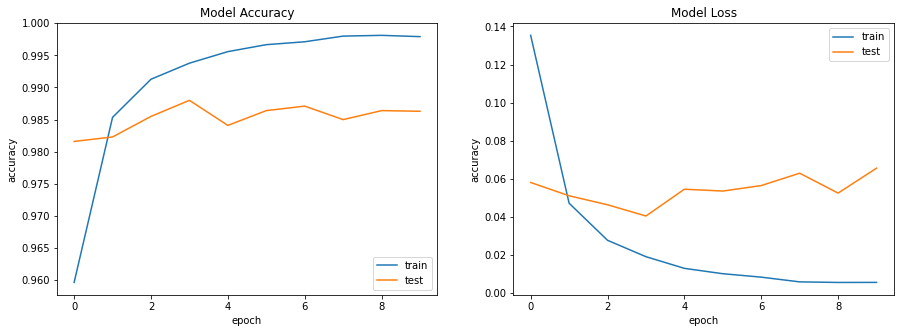

Test Accuracy is 98.630 percentage and test loss is 6.550 percentage


In [18]:
run_model_test()